## Import necessary packages

In [55]:
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import hypertools as hyp
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('poster')

## Read in data

In [2]:
data = pd.read_excel('GSS 3.xlsx', sheetname='Data')

In [3]:
data.head()

,What is your view on politics in us & world,Ballot used for interview,Year of birth,Household type,Number in family of r,Rs income in constant $,Family income in constant $,Rs job is useful to society,R has opportunity to advance,Rs income is high,...,Spend evening with friends,Spend evening with relatives,Confidence in congress,Confid. in united states supreme court,Confid. in exec branch of fed govt,Confidence in education,Confidence in major companies,Can people be trusted,Is life exciting or dull,Gss year for this respondent
0,Policies in america depend more on who is in g...,Ballot a,1969,"2adlts,mar,1+kids",1st person,164382.03756,131676.6906,No issp,No issp,No issp,...,Sev times a year,Almost daily,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Routine,2016.0
1,Policies in america depend on what is happenin...,Ballot b,1955,"1adlt,0kids",1st person,25740.00000,25740.0000,No issp,No issp,No issp,...,Sev times a year,Sev times a year,Hardly any,A great deal,Only some,Hardly any,Hardly any,Depends,Not applicable,2016.0
2,Not applicable,Ballot c,1944,"2adlts,mar,0kids",1st person,0.00000,38610.0000,No issp,No issp,No issp,...,Not applicable,Not applicable,Hardly any,A great deal,Hardly any,Only some,Only some,Can trust,Exciting,2016.0
3,Policies in america depend more on who is in g...,Ballot a,1973,"4+adlts,2mar,1+kids",2nd person,5265.00000,131676.6906,No issp,No issp,No issp,...,Sev times a week,Sev times a week,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Exciting,2016.0
4,Not applicable,Ballot c,1961,"3adlts,2mar,sp,rel,0kids",2nd person,936.00000,131676.6906,Strongly agree,Disagree,Strongly disagree,...,Not applicable,Not applicable,Hardly any,A great deal,Only some,Only some,A great deal,Can trust,Routine,2016.0


## Create new data frames only looking at happiness, work, and demographic factors

In [30]:
#list of happiness factors
happiness = ['Standard of living of r will improve', 
             'How much time felt sad in past wk', 
             'How much time felt happy in past wk',
             'How much time felt depressed in past wk',
             'I am meeting my current goals',
             'I see myself as successful',
             'I expect more good things to happen to me than bad',
             'I\'m always optimistic about my future',
             'Happiness of marriage',
             'General happiness',
             'Happiness of relt with partner',
             'Condition of health',
             'Satisfaction with financial situation',
             'Rs self ranking of social position',
             'Is life exciting or dull']

#list of work factors
work = ['Rs income in constant $',
        'Rs job is useful to society',
        'R has opportunity to advance',
        'Rs income is high',
        'Rs job is secure',
        'The highest degree r have earned',
        'Respondents income',
        'Rs living standard compared to parents',
        'Respondents income',
        'Living with parents when 16 yrs old',
        'Marital status',
        'Number of hours usually work a week',
        'Job or housework',
        'Is r likely to lose job']

#list of demographic factors
demo = ['Ballot used for interview', 
        'Gss year for this respondent                       ',
        'Year of birth',
        'Region of interview',
        'Was r born in this country']

In [82]:
demo_df = data[demo]
happiness_df = data[happiness]
work_df = data[work]

## Is happiness data clustered in any way?

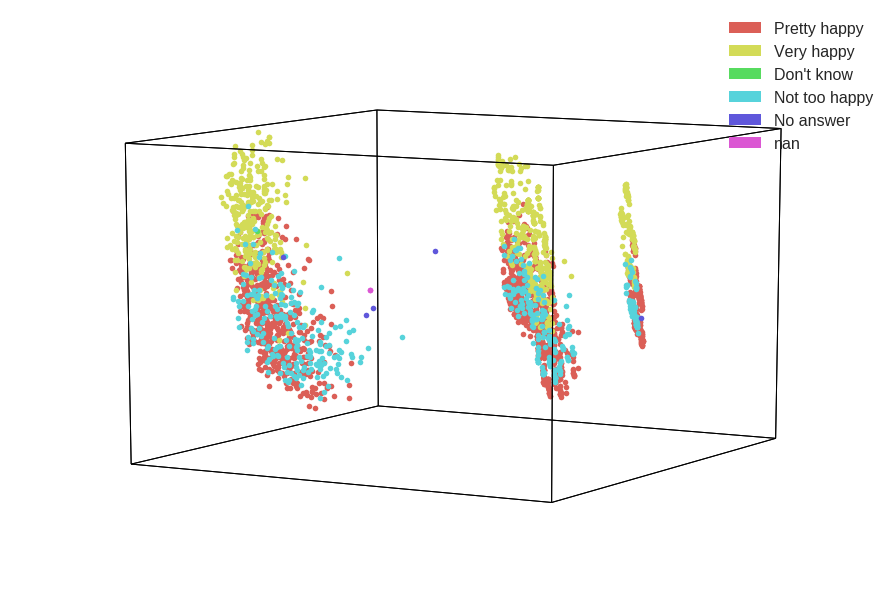

(<matplotlib.figure.Figure at 0x7fcde81bbc50>,
 [array([[0, 0, 0, ..., 0, 0, 1],
         [0, 0, 1, ..., 0, 1, 0],
         [1, 0, 0, ..., 0, 0, 0],
         ..., 
         [1, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 None)

In [83]:
hyp.plot(happiness_df, '.', group = happiness_df['General happiness'], legend = list(happiness_df['General happiness'].unique()))

Standard of living of r will improve


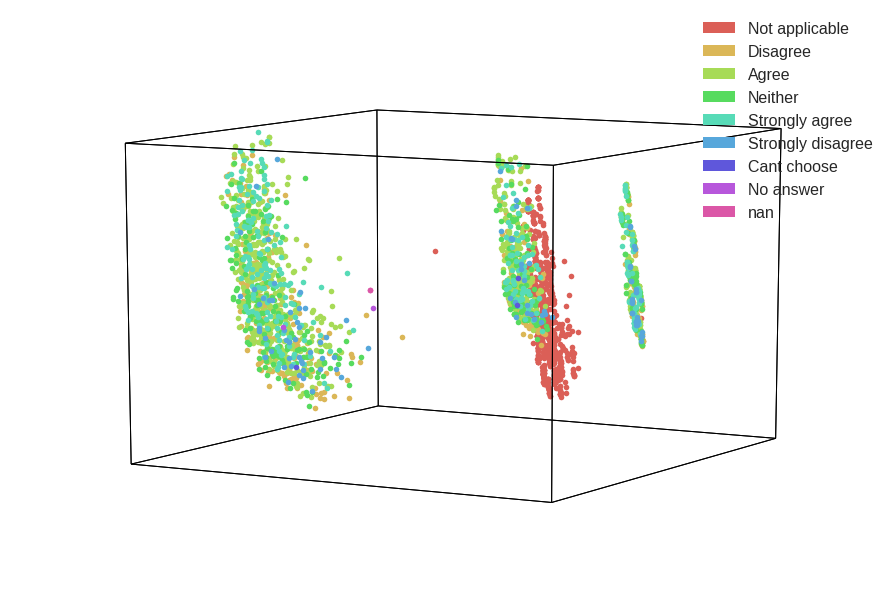

How much time felt sad in past wk


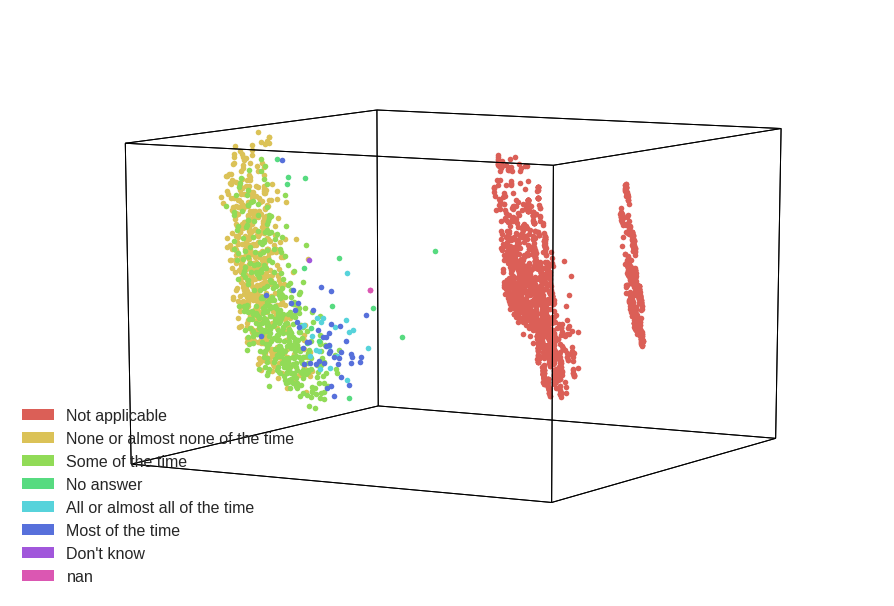

How much time felt happy in past wk


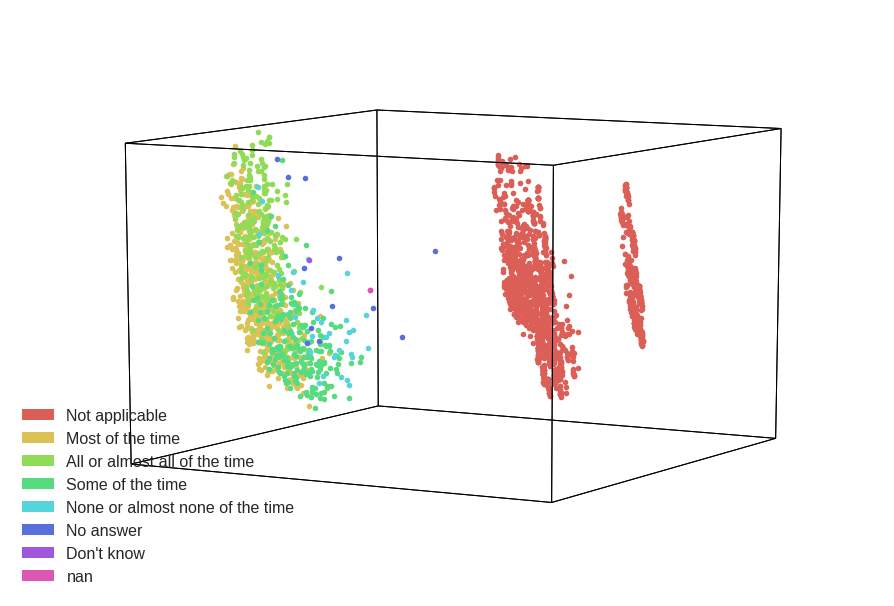

How much time felt depressed in past wk


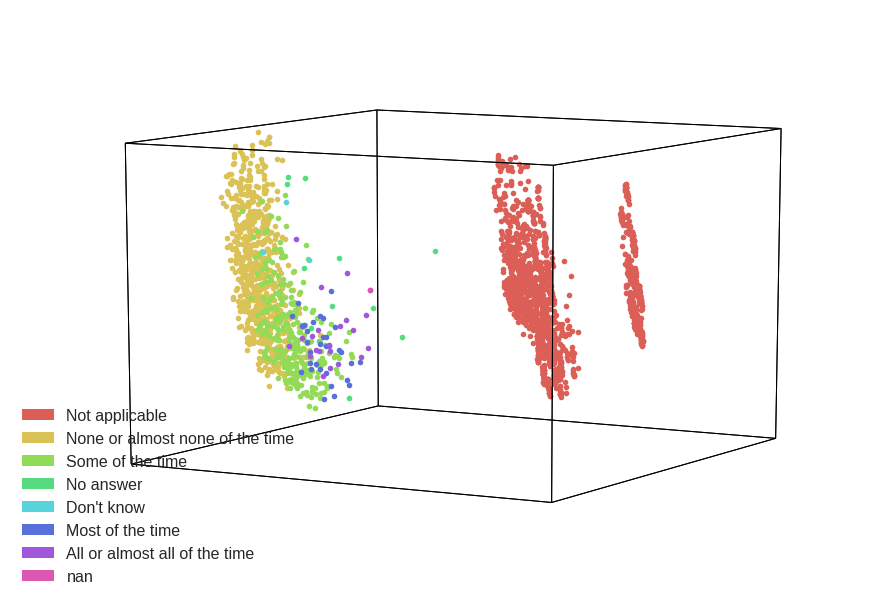

I am meeting my current goals


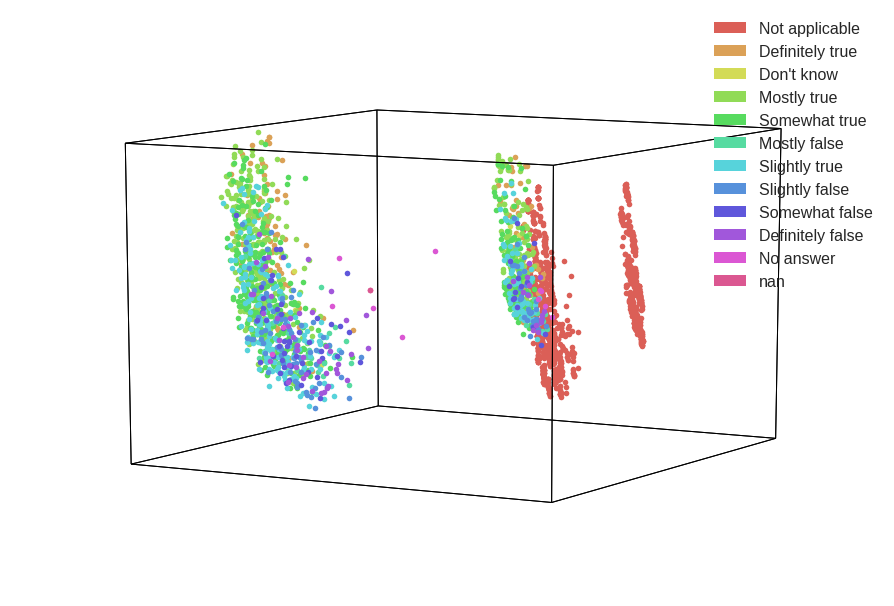

I see myself as successful


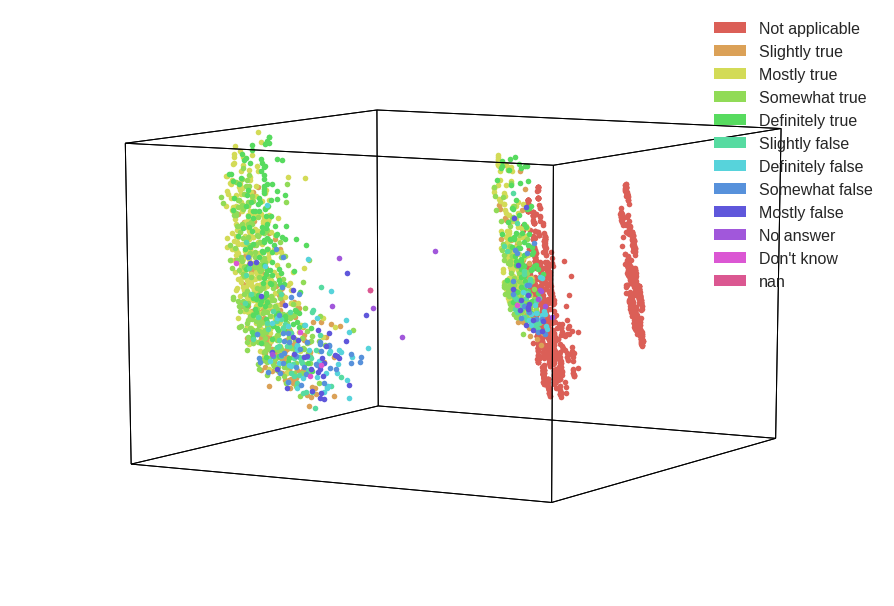

I expect more good things to happen to me than bad


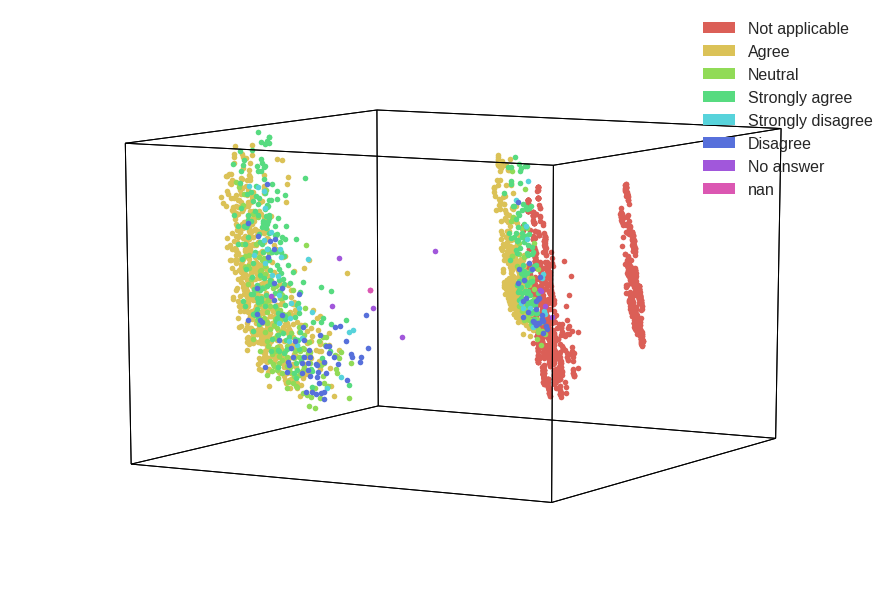

I'm always optimistic about my future


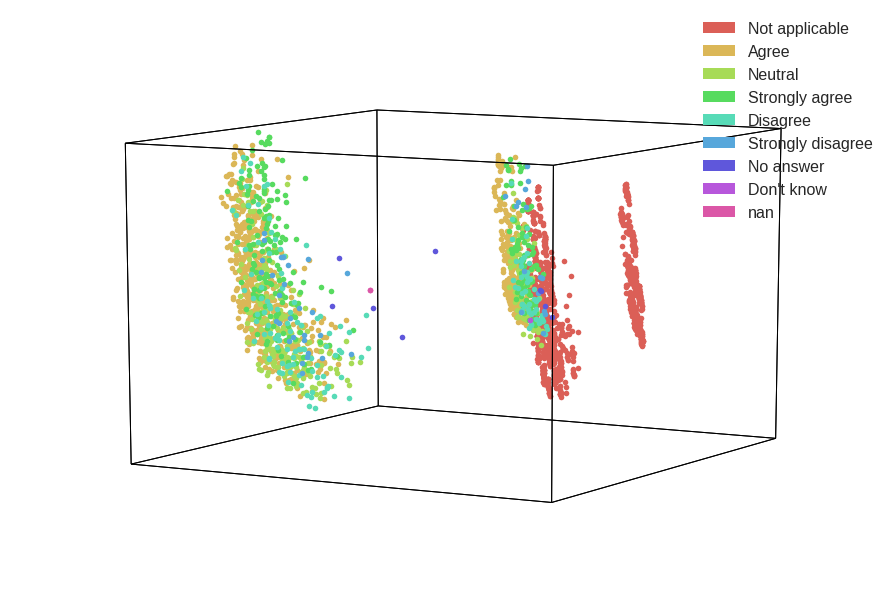

Happiness of marriage


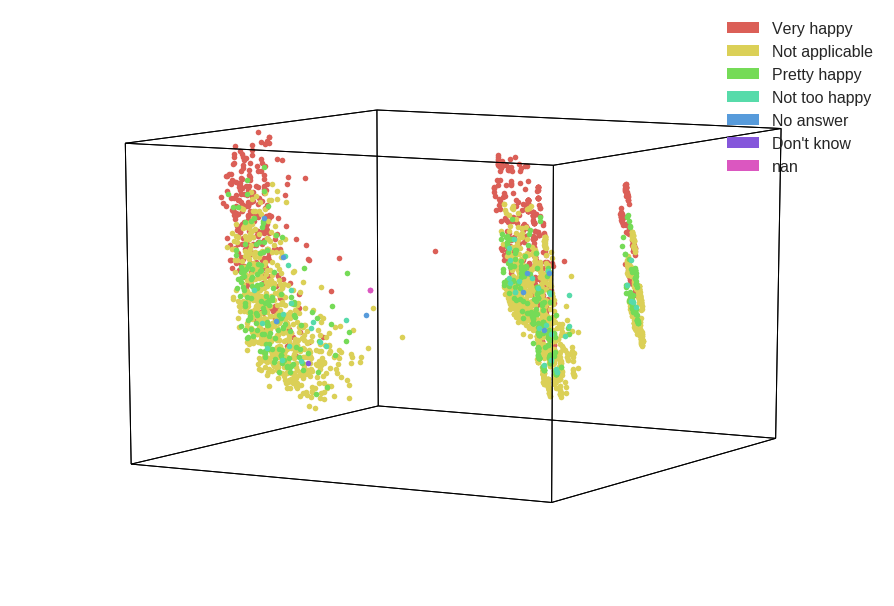

General happiness


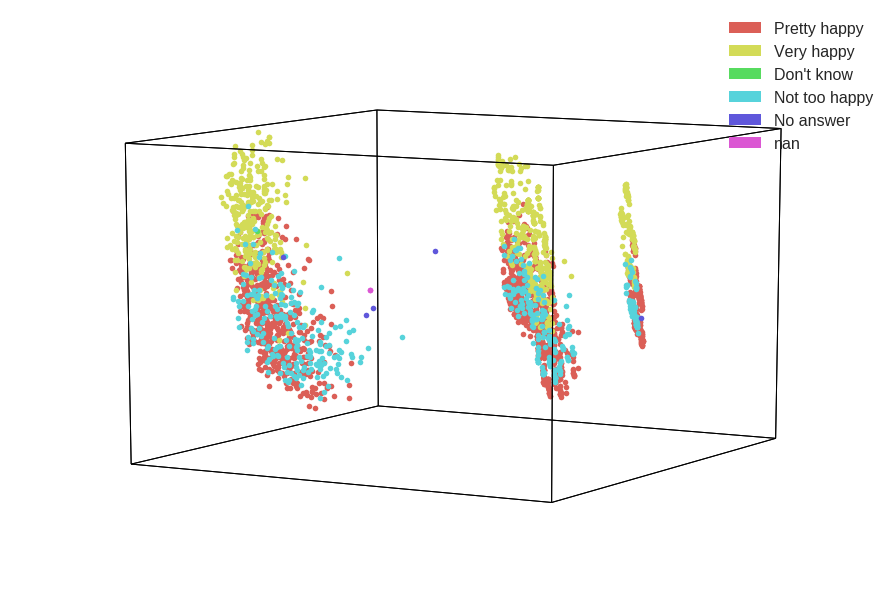

Happiness of relt with partner


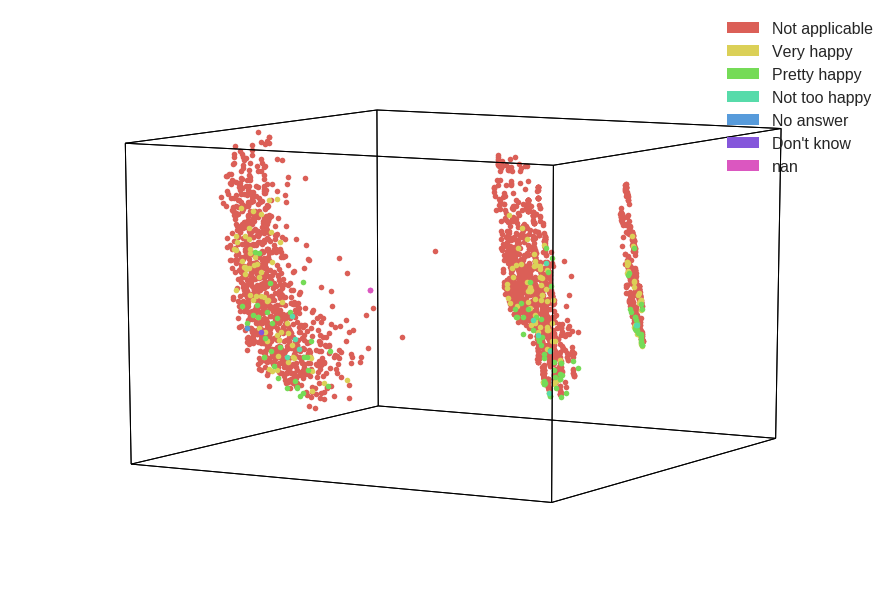

Condition of health


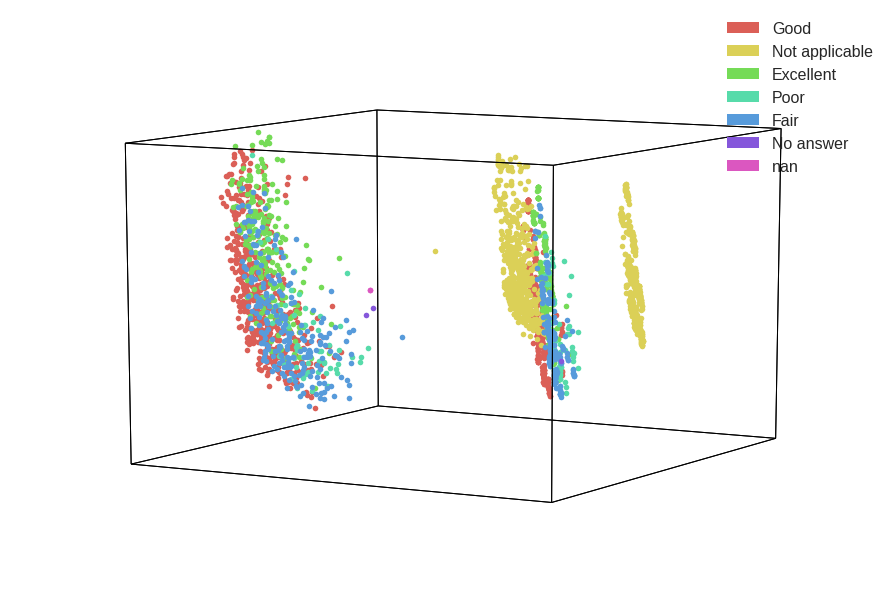

Satisfaction with financial situation


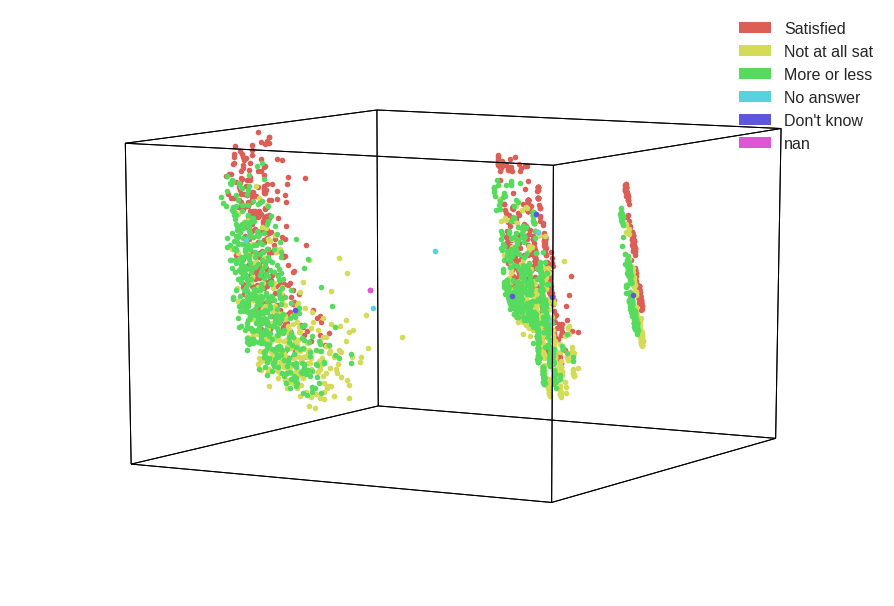

Rs self ranking of social position


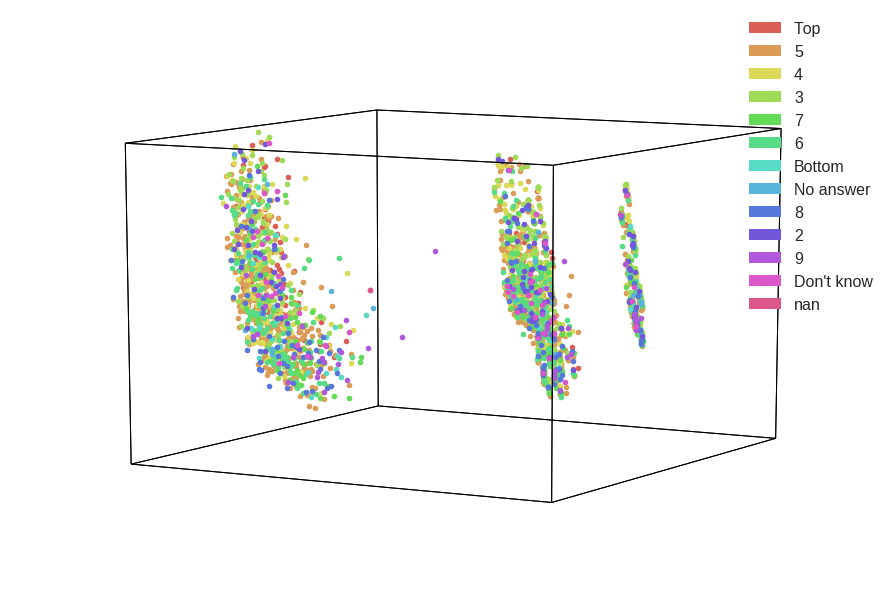

Is life exciting or dull


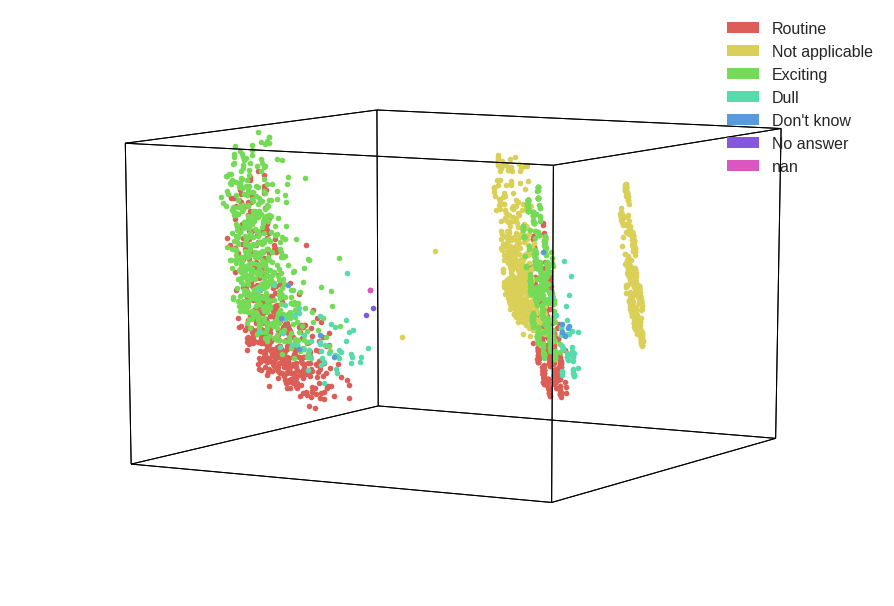

In [84]:
for factor in happiness:
    print(factor)
    hyp.plot(happiness_df, '.', group=happiness_df[factor], legend = list(happiness_df[factor].unique()))

## Overall, how many respondents consider themselves happy?

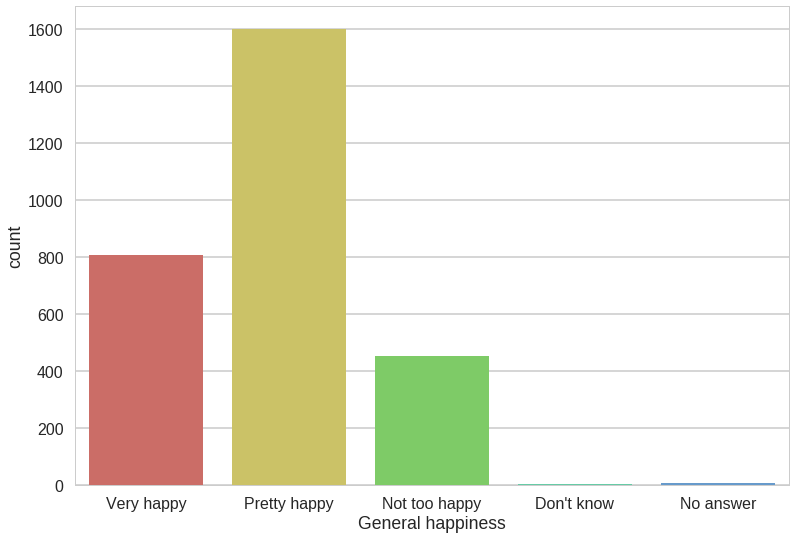

In [106]:
sns.countplot('General happiness', data = data, order = ['Very happy', 'Pretty happy', 'Not too happy', "Don't know", 'No answer'])

## What does work look like for different levels of happiness?

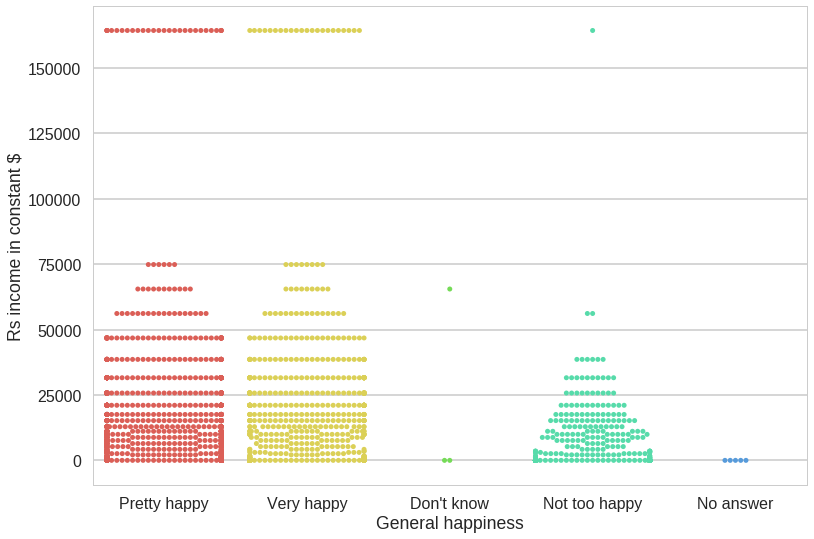

In [154]:
sns.swarmplot(data = data, x='General happiness', y='Rs income in constant $')

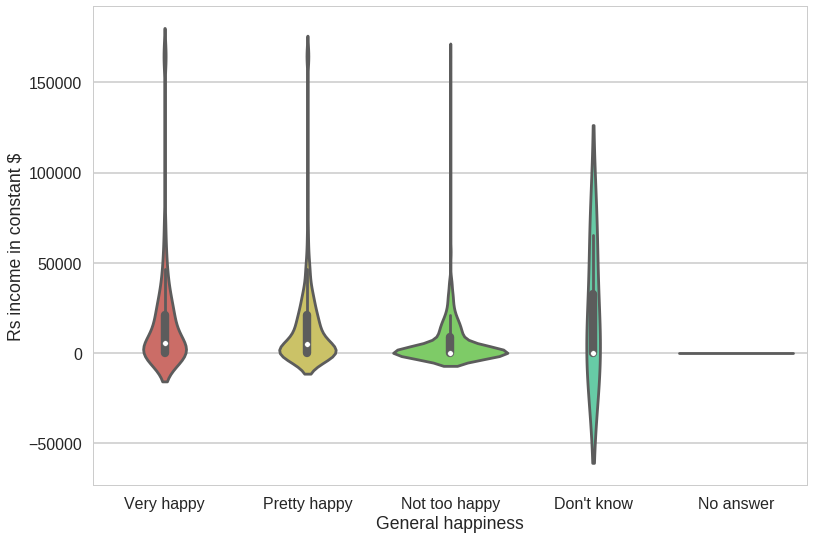

In [156]:
sns.violinplot(data = data, x='General happiness', y='Rs income in constant $', order = ['Very happy', 'Pretty happy', 'Not too happy', "Don't know"])

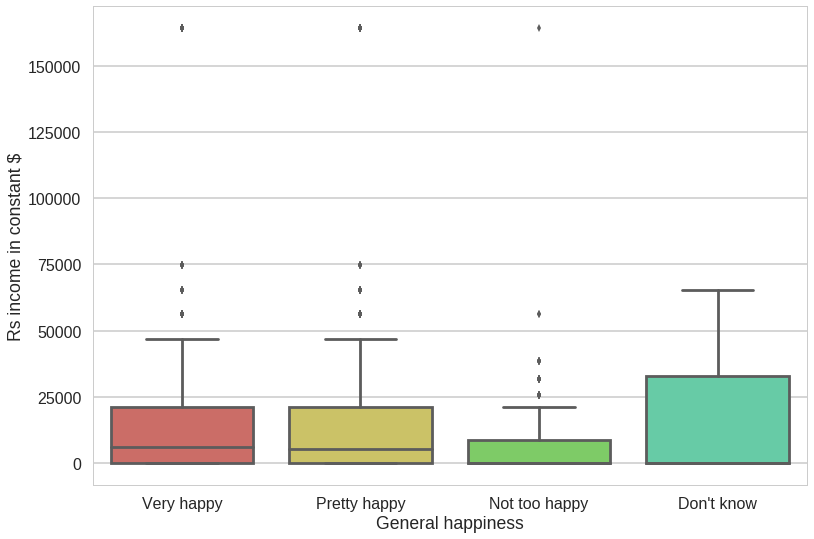

In [157]:
sns.boxplot(data = data, x='General happiness', y='Rs income in constant $', order = ['Very happy', 'Pretty happy', 'Not too happy', "Don't know"])

In [108]:
#create a data frame for people who answered "pretty happy"
pretty_happy = data.loc[data['General happiness'] == 'Pretty happy']

#create a data frame for people who answered "very happy"
very_happy = data.loc[data['General happiness'] == 'Very happy']

#create a data frame for people who answered "not too happy"
not_too_happy = data.loc[data['General happiness'] == 'Not too happy']

### Income

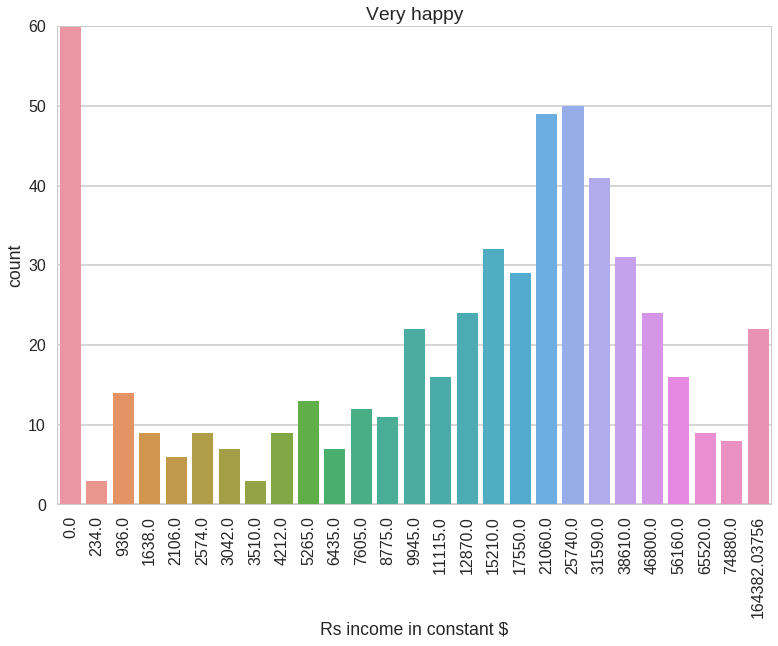

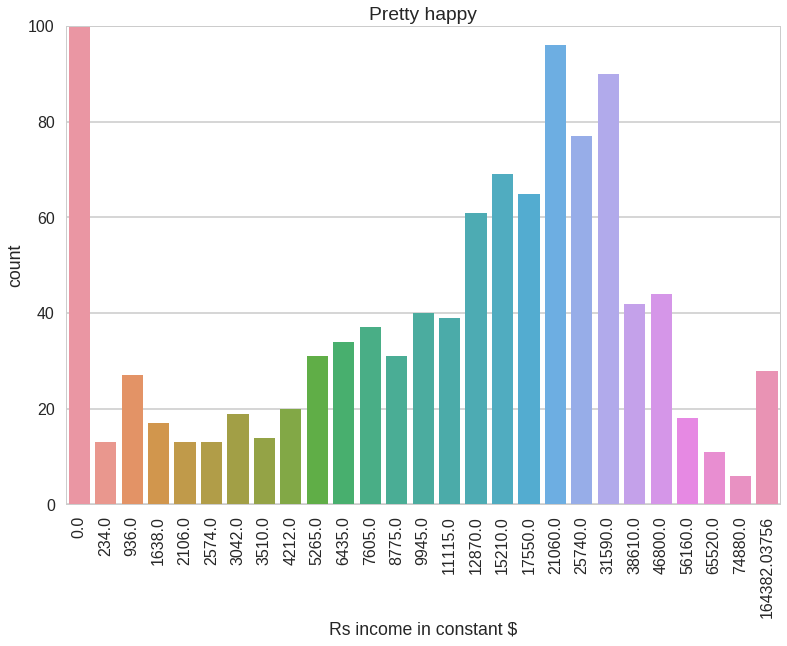

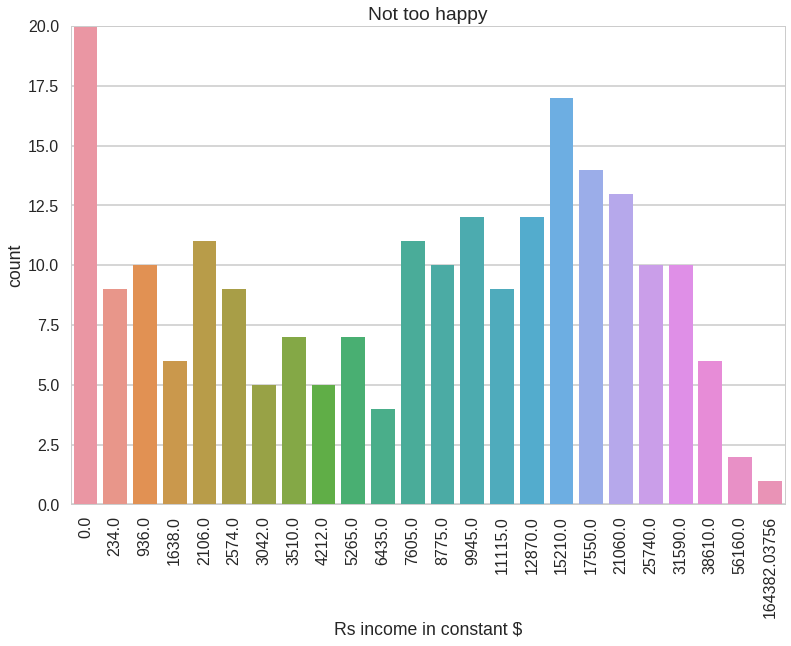

In [119]:
sns.countplot('Rs income in constant $', data = very_happy)
plt.title('Very happy')
plt.xticks(rotation=90)
plt.ylim(0, 60)
plt.show()

sns.countplot('Rs income in constant $', data = pretty_happy)
plt.title('Pretty happy')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.show()

sns.countplot('Rs income in constant $', data = not_too_happy)
plt.title('Not too happy')
plt.xticks(rotation=90)
plt.ylim(0, 20)
plt.show()

### Job satisfaction

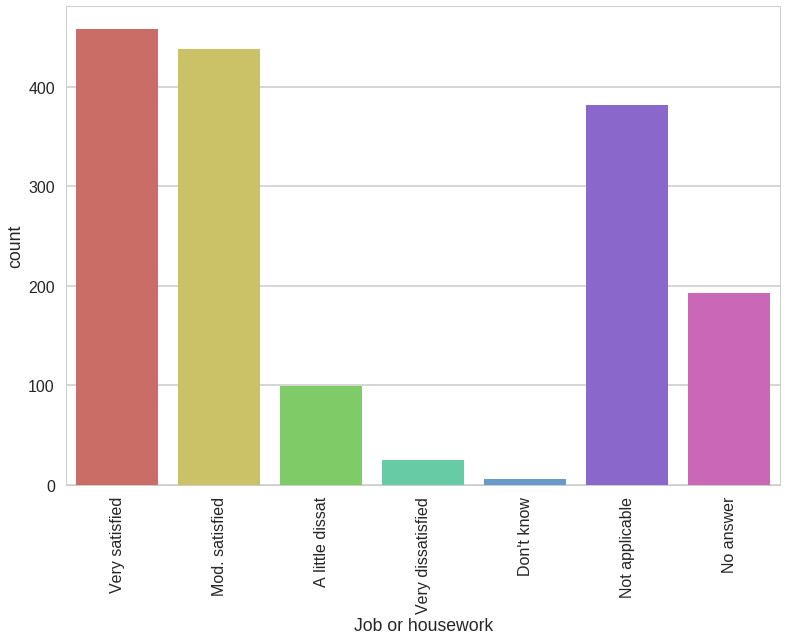

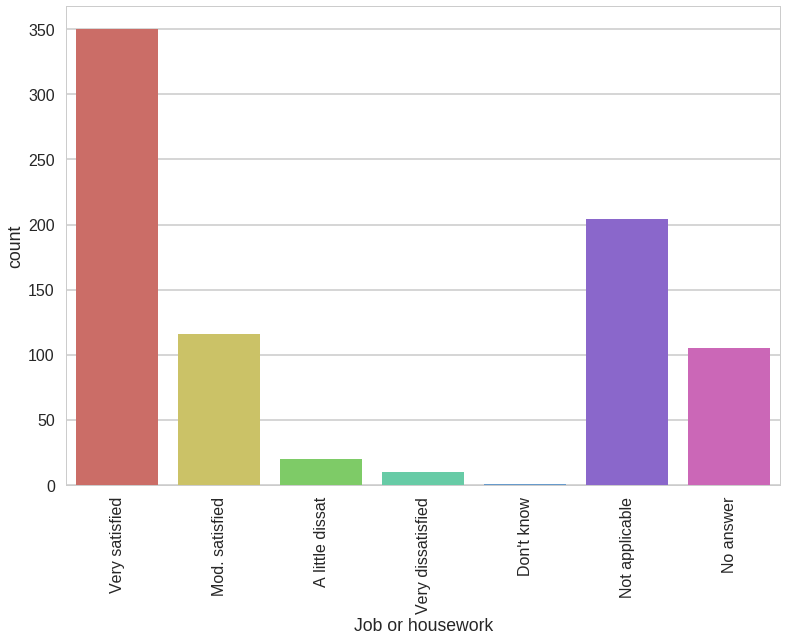

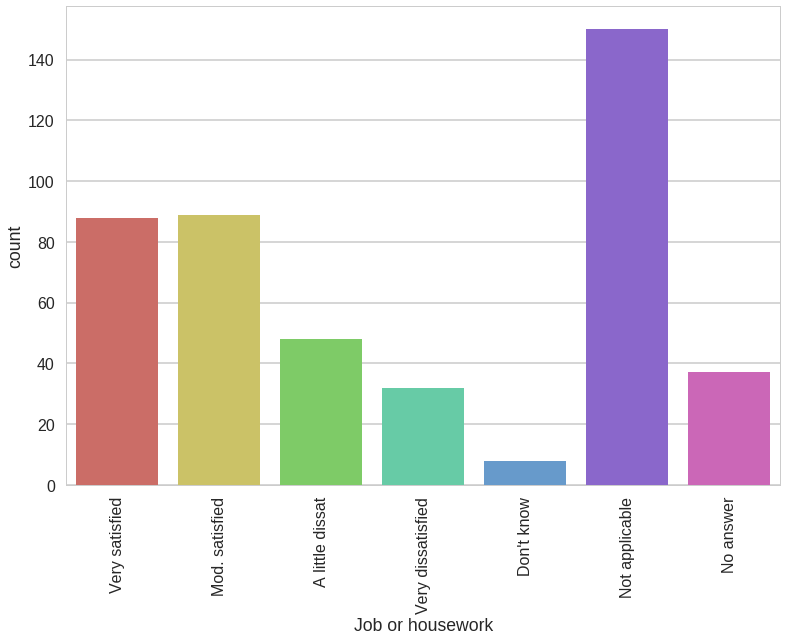

In [115]:
sns.countplot('Job or housework', data = very_happy, order = ['Very satisfied', 'Mod. satisfied', 'A little dissat', 'Very dissatisfied', "Don't know", 'Not applicable', 'No answer'])
plt.title('Very happy')
plt.xticks(rotation=90)
#plt.ylim(0, 100)
plt.show()

sns.countplot('Job or housework', data = pretty_happy, order = ['Very satisfied', 'Mod. satisfied', 'A little dissat', 'Very dissatisfied', "Don't know", 'Not applicable', 'No answer'])
plt.title('Pretty happy')
plt.xticks(rotation=90)
#plt.ylim(0, 60)
plt.show()

sns.countplot('Job or housework', data = not_too_happy, order = ['Very satisfied', 'Mod. satisfied', 'A little dissat', 'Very dissatisfied', "Don't know", 'Not applicable', 'No answer'])
plt.title('Not too happy')
plt.xticks(rotation=90)
#plt.ylim(0, 20)
plt.show()

### Job security

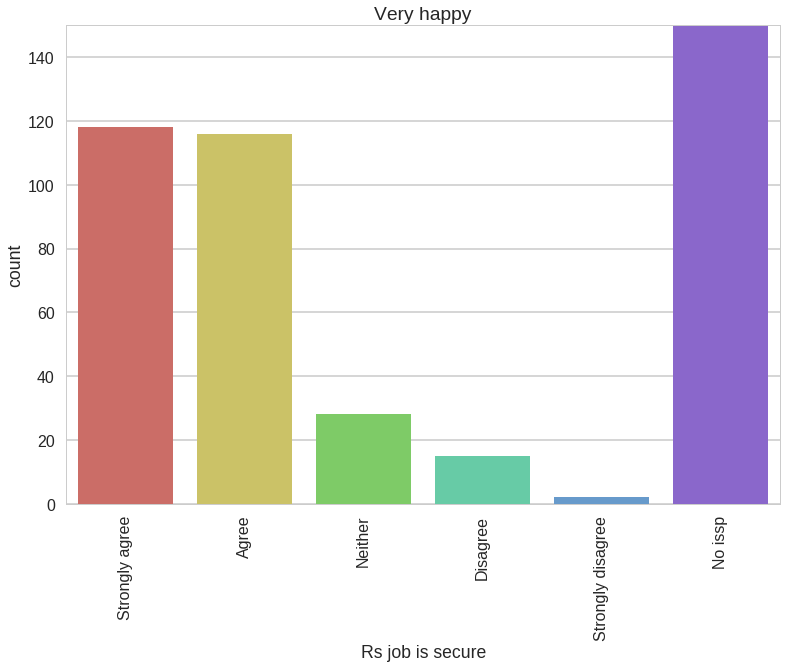

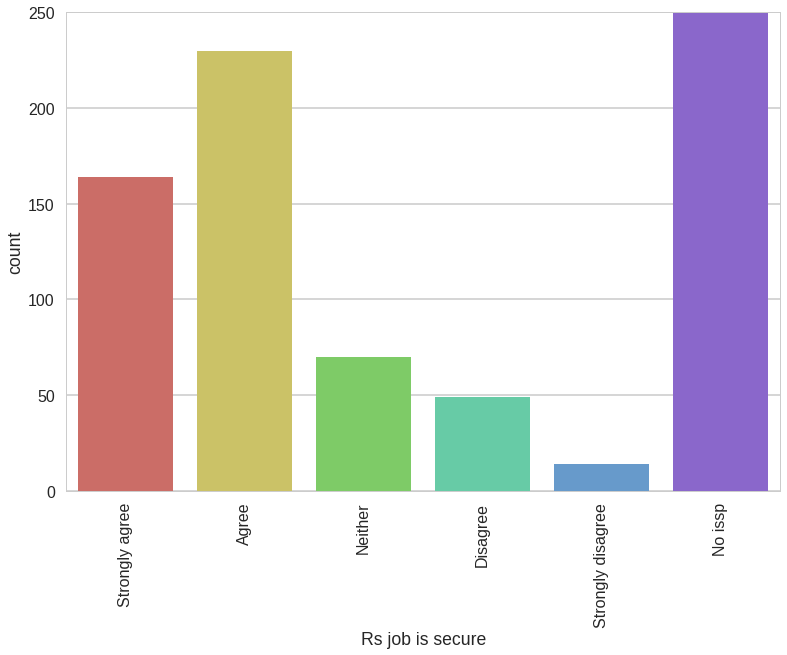

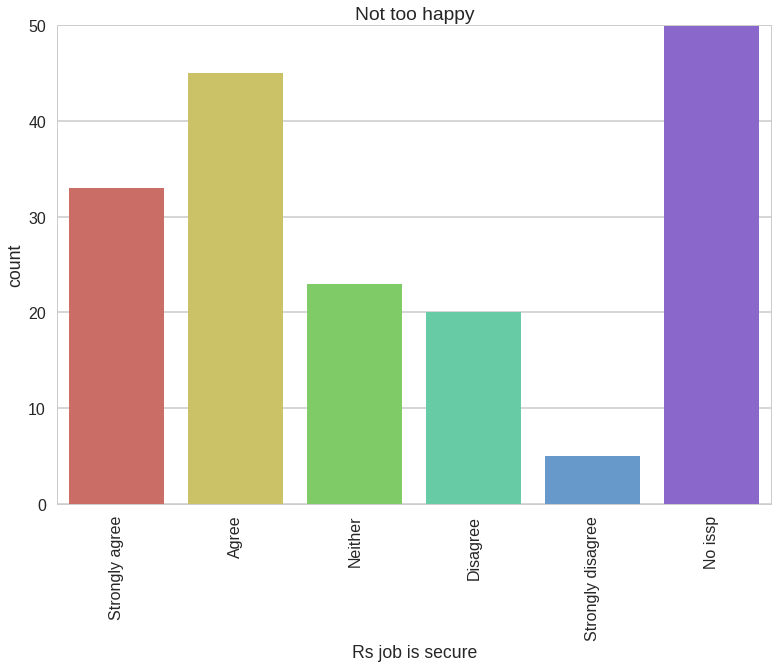

In [123]:
sns.countplot('Rs job is secure', data = very_happy, order = ['Strongly agree', 'Agree', 'Neither', 'Disagree', 'Strongly disagree', 'No issp'])
plt.title('Very happy')
plt.xticks(rotation=90)
plt.ylim(0, 150)
plt.show()

sns.countplot('Rs job is secure', data = pretty_happy, order = ['Strongly agree', 'Agree', 'Neither', 'Disagree', 'Strongly disagree', 'No issp'])
plt.xticks(rotation=90)
plt.ylim(0, 250)
plt.show()

sns.countplot('Rs job is secure', data = not_too_happy, order = ['Strongly agree', 'Agree', 'Neither', 'Disagree', 'Strongly disagree', 'No issp'])
plt.title('Not too happy')
plt.xticks(rotation=90)
plt.ylim(0, 50)
plt.show()

### Graph with percentages instead of counts

In [147]:
#write function to get percentages by dividing value count of each by total count

def answer(df, factor):
    
    #make list for all unique answers
    answers = []
    
    for answer in range(0, len(df[factor].value_counts())):
        answers.append(df[factor].value_counts().index[answer])
        
    return answers

def percentage(df, factor):
    
    #make list for all percentages
    percentage_list = []
    
    #get percentages
    for answer in range(0, len(df[factor].value_counts())):
        percentage_list.append(df[factor].value_counts()[answer]/sum(df[factor].value_counts()))
    
    return percentage_list

In [153]:
#wrong bc value_counts and unique() are not in same order
x = answer(very_happy, 'Job or housework')
print(x)

y = percentage(very_happy, 'Job or housework')
print(y)

sns.barplot(x = x, y = y, order = ['Very satisfied', 'Mod. satisfied', 'A little dissat', 'Very dissatisfied', "Don't know", 'Not applicable', 'No answer'])

TypeError: 'int' object is not callable